# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `species` using the other variables in the dataset.

**Dummify** all variables that require this.

In [37]:
import pandas as pd
import numpy as np
from sys import exit
from palmerpenguins import load_penguins
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, confusion_matrix, accuracy_score, precision_recall_fscore_support, roc_auc_score, roc_curve


In [38]:
penguins = load_penguins()
penguins = penguins.dropna()
cols_species_island = pd.get_dummies(penguins[['island']])
cols_sex = pd.get_dummies(penguins['sex'], drop_first=True)
df = penguins.drop(['island', 'sex'], axis=1)
df = pd.concat([df, cols_species_island, cols_sex], axis=1)
df

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,island_Biscoe,island_Dream,island_Torgersen,male
0,Adelie,39.1,18.7,181.0,3750.0,2007,0,0,1,1
1,Adelie,39.5,17.4,186.0,3800.0,2007,0,0,1,0
2,Adelie,40.3,18.0,195.0,3250.0,2007,0,0,1,0
4,Adelie,36.7,19.3,193.0,3450.0,2007,0,0,1,0
5,Adelie,39.3,20.6,190.0,3650.0,2007,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...
339,Chinstrap,55.8,19.8,207.0,4000.0,2009,0,1,0,1
340,Chinstrap,43.5,18.1,202.0,3400.0,2009,0,1,0,0
341,Chinstrap,49.6,18.2,193.0,3775.0,2009,0,1,0,1
342,Chinstrap,50.8,19.0,210.0,4100.0,2009,0,1,0,1


Let's use the other variables to predict `species`. Prepare your data and fit the following models on the entire dataset:

* Two kNN models (for different values of K)
* Two decision tree models (for different complexities of trees)

Compute the following, for each of your models, on test data. Keep in mind that you may need to stratify your creation of the training and test data.

* Confusion matrix
* Overall Accuracy
* Precision, Recall, AUC, and F1-score for each species

Create one ROC plot for the species of your choice.

In [39]:
X = df.drop('species', axis=1)
y = df['species']

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,stratify=y)
knn_model_1 = KNeighborsClassifier(n_neighbors=5)
knn_model_2 = KNeighborsClassifier(n_neighbors=10)
knn_model_1.fit(X_train, y_train)
knn_model_2.fit(X_train, y_train)
decision_tree_model_1 = DecisionTreeClassifier(max_depth=3)
decision_tree_model_2 = DecisionTreeClassifier(max_depth=5)
decision_tree_model_1.fit(X_train, y_train)
decision_tree_model_2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [47]:
def compute_metrics(model, X_test, y_test, target_class):
    y_pred = model.predict(X_test)
    conf_matrix = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='macro')

    if target_class in model.classes_:
        y_test_bin = (y_test == target_class).astype(int)
        y_score = model.predict_proba(X_test)[:, model.classes_.tolist().index(target_class)]
        fpr, tpr, _ = roc_curve(y_test_bin, y_score)
        auc = roc_auc_score(y_test_bin, y_score)
        return conf_matrix, accuracy, precision, recall, f1, auc, fpr, tpr

target_class = 'Chinstrap'



In [48]:
compute_metrics(knn_model_1, X_test, y_test, target_class)

(array([[30,  5,  2],
        [10,  6,  1],
        [ 0,  0, 30]]),
 0.7857142857142857,
 0.7348484848484849,
 0.7212506624271331,
 0.72005772005772,
 0.8494293239683933,
 array([0.        , 0.04477612, 0.04477612, 0.1641791 , 0.41791045,
        1.        ]),
 array([0.        , 0.05882353, 0.35294118, 0.76470588, 0.94117647,
        1.        ]))

In [49]:
models = [knn_model_1, knn_model_2, decision_tree_model_1, decision_tree_model_2]

for model in models:
    metrics = compute_metrics(model, X_test, y_test, target_class)
    print(f"Model: {model}\nConfusion Matrix:\n{metrics[0]}\nAccuracy: {metrics[1]}\nPrecision: {metrics[2]}\nRecall: {metrics[3]}\nF1-Score: {metrics[4]}\nAUC: {metrics[5]}\n")


Model: KNeighborsClassifier()
Confusion Matrix:
[[30  5  2]
 [10  6  1]
 [ 0  0 30]]
Accuracy: 0.7857142857142857
Precision: 0.7348484848484849
Recall: 0.7212506624271331
F1-Score: 0.72005772005772
AUC: 0.8494293239683933

Model: KNeighborsClassifier(n_neighbors=10)
Confusion Matrix:
[[31  1  5]
 [12  4  1]
 [ 0  0 30]]
Accuracy: 0.7738095238095238
Precision: 0.7847545219638242
Recall: 0.6910439851616322
F1-Score: 0.6825757575757575
AUC: 0.8911325724319579

Model: DecisionTreeClassifier(max_depth=3)
Confusion Matrix:
[[37  0  0]
 [ 0 17  0]
 [ 0  0 30]]
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0
AUC: 1.0

Model: DecisionTreeClassifier(max_depth=5)
Confusion Matrix:
[[37  0  0]
 [ 0 17  0]
 [ 0  0 30]]
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0
AUC: 1.0



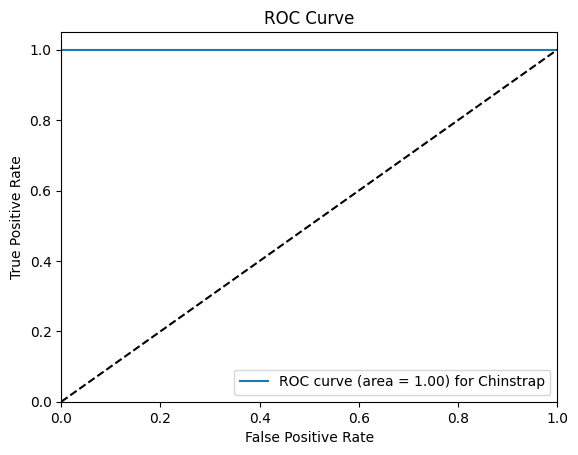

In [50]:
plt.figure()
plt.plot(metrics[-2], metrics[-1], label=f'ROC curve (area = {metrics[5]:.2f}) for {target_class}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()